# Attribution and Motifs Detection with Decima

This documentation demonstrates how to use Decima's attribution analysis capabilities to identify important regulatory regions in genomic sequences and discover transcription factor binding motifs within those regions. Attribution analysis helps reveal which parts of the DNA sequence most strongly influence gene expression predictions, while **motif scanning** can identify specific transcription factor binding sites in these regions of interest.


## CLI API

Let's look at a simple example using Decima's CLI API to analyze the SPI1 and BRD3 genes. SPI1 is a key transcription factor in myeloid cell development. We'll examine its regulation across different monocyte and macrophage cell types where it is known to be important.

In [1]:
! decima attributions --help

/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happen

Usage: decima attributions [OPTIONS]

  Generate and save attribution analysis results for a gene or a set of
  sequences and perform seqlet calling on the attributions.

  Output files:

      ├── {output_prefix}.attributions.h5      # Raw attribution score matrix
      per gene.

      ├── {output_prefix}.attributions.bigwig  # Genome browser track of
      attribution as bigwig file.

      ├── {output_prefix}.seqlets.bed          # List of attribution peaks in
      BED format.

      ├── {output_prefix}.motifs.tsv           # Detected motifs in peak
      regions.

      └── {output_prefix}.warnings.qc.log      # QC warnings about prediction
      reliability.

  Examples:

      >>> decima attributions -o output_prefix -g SPI1

      >>> decima attributions -o output_prefix -g SPI1,CD68 --tasks "cell_type
      == 'classical monocyte'" --device 0

      >>> decima attributions -o output_prefix --seqs tests/data/seqs.fasta
      --tasks "cell_type == 'classical monocyte'" --device

This decima command analyzes gene attributions: `--genes "SPI1,BRD3"` specifies focusing on SPI1 and BRD3; `--tasks "cell_type == 'classical monocyte'"` filters the analysis to classical monocytes only; and `--output_prefix` output_classical_monoctypes/ designates the output directory for the results. You can also pass `--off-tasks` that are cell types used as a contrast group when analyzing cell type specificity - they represent the cell types you want to compare against when determining. If you do not pass, `--tasks` argument all avaliable cells will be used for attribution calculation.

In [2]:
! decima attributions --model v1_rep0 --genes "SPI1,BRD3" --tasks "cell_type == 'classical monocyte'" --output-prefix example/output_classical_monoctypes

/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happen

decima - INFO - Using device: 0
decima - INFO - Loading model v1_rep0 and metadata to compute attributions...


wandb: Currently logged in as: mhcelik (mhcw) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


wandb: Downloading large artifact 'rep0:latest', 720.03MB. 1 files...


wandb:   1 of 1 files downloaded.  
Done. 00:00:01.6 (445.8MB/s)


wandb: Downloading large artifact 'metadata:latest', 3122.32MB. 1 files...


wandb:   1 of 1 files downloaded.  
Done. 00:00:07.1 (437.5MB/s)


/home/celikm5/Projects/decima/src/decima/interpret/attributer.py:66: UserWarning: `off_tasks` is not provided. Using all other tasks as off_tasks.


Computing attributions...:   0%|                          | 0/2 [00:00<?, ?it/s]

Computing attributions...:  50%|█████████         | 1/2 [00:02<00:02,  2.23s/it]

decima - WARNING - Gene BRD3 has low correlation with the model. Pearson: 0.3440624267844621. Be careful with the predictions of the model for this gene. Check `DecimaResult.load().gene_metadata['pearson']` to see the correlation of the gene with the model.
Computing attributions...: 100%|██████████████████| 2/2 [00:02<00:00,  1.33s/it]

Computing attributions...: 100%|██████████████████| 2/2 [00:02<00:00,  1.49s/it]


decima - INFO - Loading model and metadata to compute attributions...


wandb: Downloading large artifact 'metadata:latest', 3122.32MB. 1 files...


wandb:   1 of 1 files downloaded.  
Done. 00:00:02.0 (1528.2MB/s)


wandb: Downloading large artifact 'metadata:latest', 3122.32MB. 1 files...


wandb:   1 of 1 files downloaded.  
Done. 00:00:02.0 (1574.5MB/s)


Computing recursive seqlet calling...: 100%|█████| 2/2 [00:00<00:00, 459.62it/s]


/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happen

/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happen

/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/memelite/fimo.py:406: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/memelite/fimo.py:406: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


In [3]:
! ls example/output_classical_monoctypes*

example/output_classical_monoctypes_0.attributions.bigwig
example/output_classical_monoctypes_0.attributions.h5
example/output_classical_monoctypes_0.warnings.qc.log
example/output_classical_monoctypes_1.attributions.bigwig
example/output_classical_monoctypes_1.attributions.h5
example/output_classical_monoctypes_1.warnings.qc.log
example/output_classical_monoctypes.attributions.bigwig
example/output_classical_monoctypes.attributions.h5
example/output_classical_monoctypes.motifs.tsv
example/output_classical_monoctypes.seqlets.bed
example/output_classical_monoctypes.warnings.qc.log

example/output_classical_monoctypes_plots:
BRD3.peaks.png	BRD3_seqlogos  SPI1.peaks.png  SPI1_seqlogos


In [4]:
import h5py

with h5py.File("example/output_classical_monoctypes.attributions.h5", "r") as f:
    print(f["genes"][:])
    print(f["sequence"][:].shape)
    print(f["attribution"][:].shape)

[b'SPI1' b'BRD3']
(2, 524288)


(2, 4, 524288)


In [5]:
! head  example/output_classical_monoctypes.seqlets.bed | column -t -s $'\t' 

chr11  47152015  47152022  neg.SPI1@-29953  3.31894  .  -0.41688821464776993
chr11  47160163  47160167  neg.SPI1@-21805  3.33346  .  -0.2519867978990078
chr11  47160309  47160319  neg.SPI1@-21659  3.36046  .  -0.7482765801250935
chr11  47160323  47160333  neg.SPI1@-21645  3.35597  .  -0.9791450921911746
chr11  47165053  47165060  neg.SPI1@-16915  3.35769  .  -0.46799773909151554
chr11  47165593  47165606  pos.SPI1@-16375  3.41662  .  1.8055671770125628
chr11  47165642  47165653  pos.SPI1@-16326  3.37915  .  1.059839816763997
chr11  47165653  47165664  neg.SPI1@-16315  3.64033  .  -1.4299414344131947
chr11  47165664  47165670  neg.SPI1@-16304  3.36339  .  -0.4015889251604676
chr11  47165690  47165703  pos.SPI1@-16278  3.3902   .  1.1793060060590506


In [6]:
! tail example/output_classical_monoctypes.motifs.tsv | column -t -s $'\t' 

ZNF507.H13CORE.0.I.B      pos.BRD3@1374     165221  165230  +  9.005010962486267   0.0004997253417968743  CTCCTTCCC                0.0001575700912831558   -0.0002066142760199578   1381
PPARA.H13CORE.1.P.B       pos.BRD3@-61106   102728  102737  +  8.097402691841125   0.0004997253417968743  AAGAGGTGA                0.0009877644590435214   0.0027158458094883164    -61112
ZNF507.H13CORE.0.I.B      neg.BRD3@1388     165221  165230  +  9.005010962486267   0.0004997253417968743  CTCCTTCCC                0.0001575700912831558   -0.0002066142760199578   1381
ARNT.H13CORE.0.P.B        pos.BRD3@26580    190423  190432  +  8.84844446182251    0.0004997253417968755  GGACGTGTT                0.0001840576308798821   -0.00032131952384467405  26583
ZN394.H13CORE.0.P.C       pos.BRD3@573      164409  164428  +  6.16656231880188    0.0004997442047169893  GCCGCCGGAGCCGCGAGGC      0.0016583528068670268   0.003810155552068253     569
ZNF30.H13CORE.0.P.C       neg.BRD3@291      164117  164140  -  7.21854078

QC file (`qc.warnings.log`) is a quality control log file that contains warnings about prediction reliability for genes. Specifically, it warns when a gene has low correlation with the model's predictions (Pearson correlation < 0.7).

In [7]:
! head output_classical_monoctypes.warnings.qc.log

head: cannot open 'output_classical_monoctypes.warnings.qc.log' for reading: No such file or directory


### CLI Subcommands 

The Decima CLI supports running the attribution analysis pipeline step by step using dedicated subcommands. 
This modular approach allows you to execute each stage of the workflow independently, such as:
1. Generating model predictions for selected genes and cell types (`attributions-predict`).
2. Calling significant seqlets from the attributions (`attributions-recursive-seqlet-calling`).
3. Visualizing the results and motif logos (`attributions-plot`).
By chaining these subcommands, you can customize, debug, or parallelize each step of the analysis as needed.

This cell demonstrates how to run the Decima CLI to generate attributions for selected genes and cell types. The following command runs the attributions-predict subcommand for model 0 and 1, focusing on the genes SPI1 and BRD3 in cells where the cell_type is 'classical monocyte'. The results are saved with the specified output prefix.

In [8]:
! decima attributions-predict --model v1_rep0 --genes "SPI1,BRD3" --tasks "cell_type == 'classical monocyte'" --output-prefix example/output_classical_monoctypes_0

/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happen

decima - INFO - Using device: 0
decima - INFO - Loading model v1_rep0 and metadata to compute attributions...


wandb: Currently logged in as: mhcelik (mhcw) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


wandb: Downloading large artifact 'rep0:latest', 720.03MB. 1 files...


wandb:   1 of 1 files downloaded.  
Done. 00:00:01.4 (524.8MB/s)


wandb: Downloading large artifact 'metadata:latest', 3122.32MB. 1 files...


wandb:   1 of 1 files downloaded.  
Done. 00:00:02.0 (1580.3MB/s)


/home/celikm5/Projects/decima/src/decima/interpret/attributer.py:66: UserWarning: `off_tasks` is not provided. Using all other tasks as off_tasks.
Computing attributions...:   0%|                          | 0/2 [00:00<?, ?it/s]

Computing attributions...:  50%|█████████         | 1/2 [00:01<00:01,  1.33s/it]

decima - WARNING - Gene BRD3 has low correlation with the model. Pearson: 0.3440624267844621. Be careful with the predictions of the model for this gene. Check `DecimaResult.load().gene_metadata['pearson']` to see the correlation of the gene with the model.
Computing attributions...: 100%|██████████████████| 2/2 [00:02<00:00,  1.04it/s]

Computing attributions...: 100%|██████████████████| 2/2 [00:02<00:00,  1.04s/it]


In [9]:
! decima attributions-predict --model v1_rep1 --genes "SPI1,BRD3" --tasks "cell_type == 'classical monocyte'" --output-prefix example/output_classical_monoctypes_1

/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happen

decima - INFO - Using device: 0
decima - INFO - Loading model v1_rep1 and metadata to compute attributions...


wandb: Currently logged in as: mhcelik (mhcw) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


wandb: Downloading large artifact 'rep1:latest', 720.03MB. 1 files...


wandb:   1 of 1 files downloaded.  
Done. 00:00:00.9 (803.4MB/s)


wandb: Downloading large artifact 'metadata:latest', 3122.32MB. 1 files...


wandb:   1 of 1 files downloaded.  
Done. 00:00:01.9 (1614.1MB/s)


/home/celikm5/Projects/decima/src/decima/interpret/attributer.py:66: UserWarning: `off_tasks` is not provided. Using all other tasks as off_tasks.
Computing attributions...:   0%|                          | 0/2 [00:00<?, ?it/s]

Computing attributions...:  50%|█████████         | 1/2 [00:01<00:01,  1.37s/it]

decima - WARNING - Gene BRD3 has low correlation with the model. Pearson: 0.3440624267844621. Be careful with the predictions of the model for this gene. Check `DecimaResult.load().gene_metadata['pearson']` to see the correlation of the gene with the model.
Computing attributions...: 100%|██████████████████| 2/2 [00:02<00:00,  1.01it/s]

Computing attributions...: 100%|██████████████████| 2/2 [00:02<00:00,  1.07s/it]


This cell runs the recursive seqlet calling step of the Decima attribution pipeline. It takes the attributions from two models (model 0 and model 1) for the genes SPI1 and BRD3in classical monocytes, and calls significant seqlets (regions with high attribution).

In [10]:
! decima attributions-recursive-seqlet-calling --attributions "example/output_classical_monoctypes_0.attributions.h5,example/output_classical_monoctypes_1.attributions.h5" --output-prefix example/output_classical_monoctypes

/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happen

decima - INFO - Loading model and metadata to compute attributions...


wandb: Currently logged in as: mhcelik (mhcw) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


wandb: Downloading large artifact 'metadata:latest', 3122.32MB. 1 files...


wandb:   1 of 1 files downloaded.  
Done. 00:00:02.0 (1584.0MB/s)


decima - INFO - No genes provided, using all 2 genes in the attribution files.


wandb: Downloading large artifact 'metadata:latest', 3122.32MB. 1 files...


wandb:   1 of 1 files downloaded.  
Done. 00:00:01.8 (1691.6MB/s)


Computing recursive seqlet calling...: 100%|█████| 2/2 [00:00<00:00, 855.46it/s]


/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happen

/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happen

/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/memelite/fimo.py:406: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/memelite/fimo.py:406: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


The following cell runs the Decima CLI to generate plots for the attributions and discovered seqlets. It uses the output prefix from previous steps and generates visualizations for the specified genes (SPI1, BRD3), highlighting motif locations within 500bp of the transcription start site (TSS).

In [11]:
! decima attributions-plot --output-prefix example/output_classical_monoctypes -g "SPI1,BRD3" --tss-distance 500

/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happen

Plotting attributions...:   0%|                           | 0/2 [00:00<?, ?it/s]

wandb: Currently logged in as: mhcelik (mhcw) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


wandb: Downloading large artifact 'metadata:latest', 3122.32MB. 1 files...


wandb:   1 of 1 files downloaded.  
Done. 00:00:01.9 (1666.6MB/s)


/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 10 x 2 in image.
/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: example/output_classical_monoctypes_plots/SPI1.peaks.png


Plotting attributions...:  50%|█████████▌         | 1/2 [00:12<00:12, 12.95s/it]

wandb: Downloading large artifact 'metadata:latest', 3122.32MB. 1 files...


wandb:   1 of 1 files downloaded.  
Done. 00:00:01.9 (1648.9MB/s)


/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 10 x 2 in image.
/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: example/output_classical_monoctypes_plots/BRD3.peaks.png


Plotting attributions...: 100%|███████████████████| 2/2 [00:23<00:00, 11.94s/it]


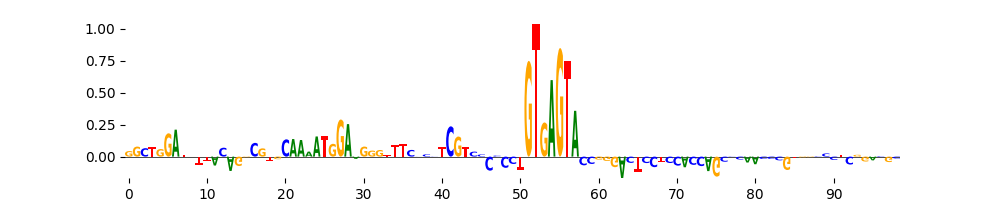

In [12]:
from IPython.display import Image

Image("example/output_classical_monoctypes_plots/SPI1_seqlogos/SPI1@267.png")

### Querying Cells

To obtain attributions, cells of interest must be selected using the query API. We support Pandas' query API functionality on the cell metadata DataFrame. Here are examples of how to write queries:

In [13]:
! decima query-cell --help

/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happen

Usage: decima query-cell [OPTIONS] [QUERY]

  Query a cell using query string

  Examples:

      >>> decima query-cell 'cell_type == "classical monocyte"'     ...

      >>> decima query-cell 'cell_type == "classical monocyte" and disease ==
      "healthy" and tissue == "blood"'     ...

      >>> decima query-cell 'cell_type.str.contains("monocyte") and disease ==
      "healthy"'     ...

Options:
  --metadata TEXT  Path to the metadata anndata file or name of the model.
                   Default: ensemble.
  --help           Show this message and exit.


Query cells of type "classical monocyte" using Pandas query syntax: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html

In [14]:
! decima query-cell 'cell_type == "classical monocyte"' | column -t -s $'\t'

/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happen

wandb: Currently logged in as: mhcelik (mhcw) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


wandb: Downloading large artifact 'metadata:latest', 3122.32MB. 1 files...


wandb:   1 of 1 files downloaded.  
Done. 00:00:01.8 (1700.8MB/s)


          cell_type           tissue                            organ           disease                                         study                                 dataset      region  subregion  celltype_coarse  n_cells  total_counts        n_genes  size_factor         train_pearson       val_pearson         test_pearson
agg_4705  classical monocyte  alveolar system                   lung            COVID-19                                        GSE155249                             scimilarity  nan     nan                         7244     26544273.0          15325    34749.092791034054  0.946616874183219   0.8437000068912937  0.8506571540216992
agg_4706  classical monocyte  alveolar system                   lung            healthy                                         GSE155249                             scimilarity  nan     nan                         72       218105.0            9142     30484.31888978114   0.9102228263646758  0.8083487523192785  0.8047828694155461
agg_4707  

Query cells that:
- have "monocyte" in their cell type name (cell_type.str.contains("monocyte"))
- are from healthy donors (disease == "healthy")

In [15]:
! decima query-cell 'cell_type.str.contains("monocyte") and disease == "healthy"' | column -t -s $'\t'

/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happen

wandb: Currently logged in as: mhcelik (mhcw) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


wandb: Downloading large artifact 'metadata:latest', 3122.32MB. 1 files...


wandb:   1 of 1 files downloaded.  
Done. 00:00:01.9 (1657.8MB/s)


          cell_type               tissue                            organ           disease  study                                 dataset      region  subregion  celltype_coarse  n_cells  total_counts  n_genes  size_factor         train_pearson       val_pearson         test_pearson
agg_4706  classical monocyte      alveolar system                   lung            healthy  GSE155249                             scimilarity  nan     nan                         72       218105.0      9142     30484.31888978114   0.9102228263646758  0.8083487523192785  0.8047828694155461
agg_4707  classical monocyte      ampulla of uterine tube           fallopian tube  healthy  fc77d2ae-247d-44d7-aa24-3f4859254c2c  scimilarity  nan     nan                         78       550950.0      9639     30719.377971431015  0.9077670011915634  0.8045070167513724  0.7896845423359651
agg_4709  classical monocyte      aorta                             vasculature     healthy  GSE166676                             sc

This query selects cells that are:
- classical monocytes (cell_type == "classical monocyte")
- from healthy donors (disease == "healthy")
- from blood tissue (tissue == "blood")

In [16]:
! decima query-cell 'cell_type == "classical monocyte" and disease == "healthy" and tissue == "blood"' | column -t -s $'\t'

/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happen

wandb: Currently logged in as: mhcelik (mhcw) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


wandb: Downloading large artifact 'metadata:latest', 3122.32MB. 1 files...


wandb:   1 of 1 files downloaded.  
Done. 00:00:01.9 (1663.1MB/s)


          cell_type           tissue  organ  disease  study                                 dataset      region  subregion  celltype_coarse  n_cells  total_counts  n_genes  size_factor         train_pearson       val_pearson         test_pearson
agg_4733  classical monocyte  blood   blood  healthy  03f821b4-87be-4ff4-b65a-b5fc00061da7  scimilarity  nan     nan                         32464    109280914.0   16158    33646.02843110038   0.9568728712803031  0.8545324533535094  0.8487445540580735
agg_4734  classical monocyte  blood   blood  healthy  436154da-bcf1-4130-9c8b-120ff9a888f2  scimilarity  nan     nan                         76800    206490628.0   16683    30736.453324546856  0.955313650235467   0.8494127267867799  0.84210567312908
agg_4735  classical monocyte  blood   blood  healthy  5d445965-6f1a-4b68-ba3a-b8f765155d3a  scimilarity  nan     nan                         1044     3638976.0     12306    30542.8977364245    0.9465384578921433  0.851991795617166   0.8308191715256182


### Attribution calling with custom genes and sequences

In this section, we demonstrate how to call attributions using custom gene sequences.
You can provide your own FASTA file containing sequences of interest and run attribution analysis
for any set of genes or genomic regions, using the Decima command-line interface.
The following examples show how to inspect your FASTA file, run attributions, and explore the output files.
The FASTA header line for each sequence contains the gene name and the coordinates of the masked region used for attribution analysis. 
For example, in the header:

    CD68|gene_mask_start=163840|gene_mask_end=166460
"CD68" is the gene name, "gene_mask_start" and "gene_mask_end" specify the start and end positions (relative to the input sequence) of the region that was masked and analyzed for attributions.

In [17]:
! cat ../tests/data/seqs.fasta | cut -c 1-200

cat: ../tests/data/seqs.fasta: No such file or directory


In [18]:
! decima attributions --model v1_rep0 --seqs ../../tests/data/seqs.fasta --tasks "cell_type == 'classical monocyte'" --output-prefix example/output_custom_seqs

/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happen

decima - INFO - Using device: 0
decima - INFO - Loading model v1_rep0 and metadata to compute attributions...


wandb: Currently logged in as: mhcelik (mhcw) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


wandb: Downloading large artifact 'rep0:latest', 720.03MB. 1 files...


wandb:   1 of 1 files downloaded.  
Done. 00:00:00.9 (837.1MB/s)


wandb: Downloading large artifact 'metadata:latest', 3122.32MB. 1 files...


wandb:   1 of 1 files downloaded.  
Done. 00:00:02.0 (1562.9MB/s)


/home/celikm5/Projects/decima/src/decima/interpret/attributer.py:66: UserWarning: `off_tasks` is not provided. Using all other tasks as off_tasks.


Computing attributions...:   0%|                          | 0/2 [00:00<?, ?it/s]

Computing attributions...:  50%|█████████         | 1/2 [00:01<00:01,  1.38s/it]

Computing attributions...: 100%|██████████████████| 2/2 [00:02<00:00,  1.00it/s]

Computing attributions...: 100%|██████████████████| 2/2 [00:02<00:00,  1.08s/it]


decima - INFO - Saving sequences...
Saving sequences...: 2it [00:00, 10965.50it/s]
decima - INFO - Loading model and metadata to compute attributions...


wandb: Downloading large artifact 'metadata:latest', 3122.32MB. 1 files...


wandb:   1 of 1 files downloaded.  
Done. 00:00:02.2 (1445.0MB/s)


decima - INFO - No genes provided, using all 2 genes in the attribution files.
Computing recursive seqlet calling...: 100%|█████| 2/2 [00:00<00:00, 597.44it/s]


/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happen

/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happen

/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/memelite/fimo.py:406: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/memelite/fimo.py:406: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


The output file for custom sequence also contains additional file of `seqs.fasta` which contains custom seqs. To visualize prediction on IGV, first load this fasta file and its index (.fai) to IGV, then load bam and bed files.

In [19]:
! ls example/output_custom_seqs*

example/output_custom_seqs.attributions.bigwig
example/output_custom_seqs.attributions.h5
example/output_custom_seqs.motifs.tsv
example/output_custom_seqs.seqlets.bed
example/output_custom_seqs.seqs.fasta
example/output_custom_seqs.seqs.fasta.fai
example/output_custom_seqs.warnings.qc.log


## Python User API


In [20]:
! ls example/output_classical_monoctypes.*

example/output_classical_monoctypes.attributions.bigwig
example/output_classical_monoctypes.attributions.h5
example/output_classical_monoctypes.motifs.tsv
example/output_classical_monoctypes.seqlets.bed
example/output_classical_monoctypes.warnings.qc.log


In [21]:
from decima.interpret.attributions import AttributionResult

with AttributionResult("example/output_classical_monoctypes.attributions.h5") as ar:
    seqs, attrs = ar.load(["SPI1"])
    print("seqs:", seqs)
    print("attrs:", attrs)

/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happen

Loading attributions and sequences...:   0%|          | 0/1 [00:00<?, ?it/s]

Loading attributions and sequences...: 100%|██████████| 1/1 [00:00<00:00, 432.31it/s]

/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happen

seqs: [[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]
  [0. 1. 0. ... 1. 0. 1.]
  [1. 0. 0. ... 0. 1. 0.]]]
attrs: [[[-5.10058962e-05 -3.67399698e-05  7.25216159e-06 ... -1.40011580e-05
   -5.10658174e-06 -6.25329176e-06]
  [-5.10058962e-05 -3.67399698e-05 -2.17564848e-05 ... -1.40011580e-05
   -5.10658174e-06 -6.25329176e-06]
  [-5.10058962e-05  1.10219909e-04  7.25216159e-06 ...  4.20034739e-05
   -5.10658174e-06  1.87598753e-05]
  [ 1.53017689e-04 -3.67399698e-05  7.25216159e-06 ... -1.40011580e-05
    1.53197452e-05 -6.25329176e-06]]]


Let's look at a simple example using Decima's Python API to analyze the SPI1 gene, which is a key transcription factor in myeloid cell development. We'll examine its regulation across different monocyte and macrophage cell types where it is known to be important.

First we choice the cells, we are interested in:


In [22]:
with AttributionResult("example/output_classical_monoctypes.attributions.h5") as ar:
    attribution = ar.load_attribution("SPI1")

wandb: Currently logged in as: mhcelik (mhcw) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


wandb: Downloading large artifact 'metadata:latest', 3122.32MB. 1 files...


wandb:   1 of 1 files downloaded.  


Done. 00:00:01.8 (1731.2MB/s)


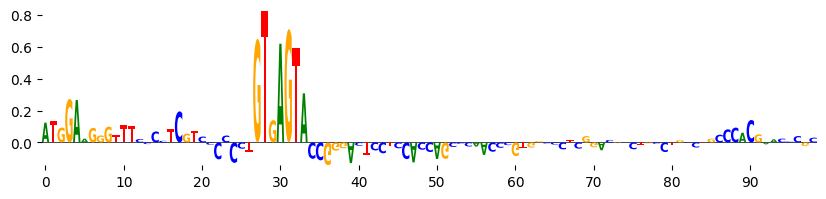

In [23]:
import matplotlib.pyplot as plt

attribution.plot_seqlogo(relative_loc=291)
plt.show()

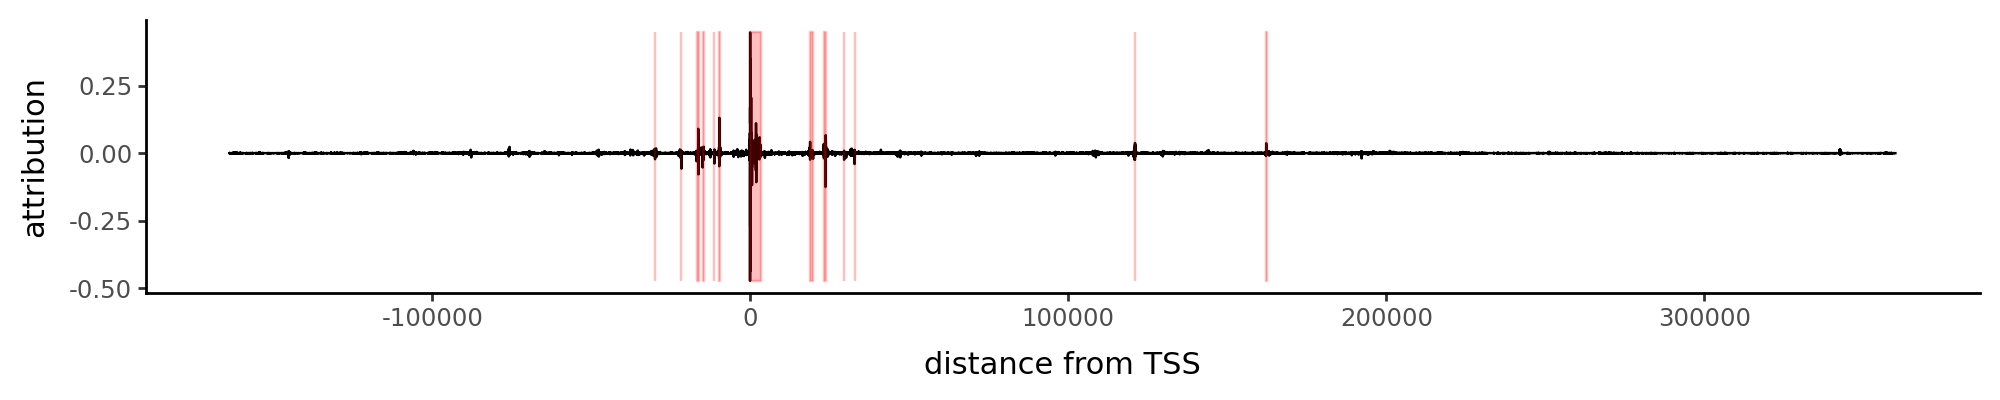

In [24]:
attribution.plot_peaks()

In [25]:
import torch
from decima import predict_attributions_seqlet_calling

device = "cuda" if torch.cuda.is_available() else "cpu"

%matplotlib inline

In [26]:
spi1_cell_types = [
    "classical monocyte",
    "intermediate monocyte",
    "non-classical monocyte",
    "alveolar macrophage",
    "macrophage",
]

In [27]:
predict_attributions_seqlet_calling(
    output_prefix="example/attrs_SP1I_monoctypes",
    genes=["SPI1"],
    tasks=f"cell_type in {spi1_cell_types}",
    device=device,
)

wandb: Downloading large artifact 'rep0:latest', 720.03MB. 1 files...


wandb:   1 of 1 files downloaded.  


Done. 00:00:00.6 (1180.1MB/s)


wandb: Downloading large artifact 'metadata:latest', 3122.32MB. 1 files...


wandb:   1 of 1 files downloaded.  


Done. 00:00:01.8 (1694.4MB/s)


/home/celikm5/Projects/decima/src/decima/interpret/attributer.py:66: UserWarning: `off_tasks` is not provided. Using all other tasks as off_tasks.


Computing attributions...:   0%|          | 0/1 [00:00<?, ?it/s]

Computing attributions...: 100%|██████████| 1/1 [00:01<00:00,  1.51s/it]

Computing attributions...: 100%|██████████| 1/1 [00:01<00:00,  1.55s/it]

wandb: Downloading large artifact 'rep1:latest', 720.03MB. 1 files...


wandb:   1 of 1 files downloaded.  


Done. 00:00:01.6 (442.2MB/s)


wandb: Downloading large artifact 'metadata:latest', 3122.32MB. 1 files...


wandb:   1 of 1 files downloaded.  


Done. 00:00:01.8 (1701.1MB/s)


/home/celikm5/Projects/decima/src/decima/interpret/attributer.py:66: UserWarning: `off_tasks` is not provided. Using all other tasks as off_tasks.


Computing attributions...:   0%|          | 0/1 [00:00<?, ?it/s]

Computing attributions...: 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

Computing attributions...: 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]

wandb: Downloading large artifact 'rep2:latest', 720.03MB. 1 files...


wandb:   1 of 1 files downloaded.  


Done. 00:00:01.9 (387.4MB/s)


wandb: Downloading large artifact 'metadata:latest', 3122.32MB. 1 files...


wandb:   1 of 1 files downloaded.  


Done. 00:00:01.9 (1684.4MB/s)


/home/celikm5/Projects/decima/src/decima/interpret/attributer.py:66: UserWarning: `off_tasks` is not provided. Using all other tasks as off_tasks.


Computing attributions...:   0%|          | 0/1 [00:00<?, ?it/s]

Computing attributions...: 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

Computing attributions...: 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]

wandb: Downloading large artifact 'rep3:latest', 720.03MB. 1 files...


wandb:   1 of 1 files downloaded.  


Done. 00:00:01.8 (402.4MB/s)


wandb: Downloading large artifact 'metadata:latest', 3122.32MB. 1 files...


wandb:   1 of 1 files downloaded.  


Done. 00:00:01.9 (1651.1MB/s)


/home/celikm5/Projects/decima/src/decima/interpret/attributer.py:66: UserWarning: `off_tasks` is not provided. Using all other tasks as off_tasks.


Computing attributions...:   0%|          | 0/1 [00:00<?, ?it/s]

Computing attributions...: 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

Computing attributions...: 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]

wandb: Downloading large artifact 'metadata:latest', 3122.32MB. 1 files...


wandb:   1 of 1 files downloaded.  


Done. 00:00:01.8 (1737.2MB/s)


wandb: Downloading large artifact 'metadata:latest', 3122.32MB. 1 files...


wandb:   1 of 1 files downloaded.  


Done. 00:00:01.9 (1658.9MB/s)


Computing recursive seqlet calling...:   0%|          | 0/1 [00:00<?, ?it/s]

Computing recursive seqlet calling...: 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]

Computing recursive seqlet calling...: 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]

/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happen

/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/memelite/fimo.py:406: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


Similar to command line you can use `predict_save_attributions` and `recursive_seqlet_calling` functions calls attirubitions and seqlets step by step.

### Custom Sequences

Attributions for a custom sequence can be calculated by passing data frame with columns of `seq`, `gene_mask_start`, `gene_mask_end`. The index of the DataFrame will be used as gene names. 

In [28]:
import pandas as pd

df_seqs = pd.read_csv("../tests/data/seqs.csv", index_col=0)
df_seqs

FileNotFoundError: [Errno 2] No such file or directory: '../tests/data/seqs.csv'

In [29]:
predict_attributions_seqlet_calling(
    output_prefix="example/attrs_custom_seqs_monoctypes",
    seqs=df_seqs,  # <-- custom sequences
    tasks=f"cell_type in {spi1_cell_types}",
    device=device,
)
! ls attrs_custom_seqs_monoctypes

NameError: name 'df_seqs' is not defined

In [30]:
import random
import torch
from grelu.sequence.format import strings_to_one_hot
from decima.constants import DECIMA_CONTEXT_SIZE

DECIMA_CONTEXT_SIZE

524288

In [31]:
seqs = torch.cat(
    [
        strings_to_one_hot(
            ["".join(random.choice(["A", "T", "C", "G"]) for _ in range(DECIMA_CONTEXT_SIZE))]
        ),  # one-hot encoded sequence
        torch.ones(1, 1, DECIMA_CONTEXT_SIZE),  # binary mask for the gene
    ],
    dim=1,
)
seqs.shape

torch.Size([1, 5, 524288])

In [32]:
predict_attributions_seqlet_calling(
    output_prefix="example/attrs_custom_tensors_monoctypes",
    seqs=seqs,  # <-- custom sequences as torch.Tensor where (batch_size, 5, seq_len), second dimension is one-hot encoded sequence and binary mask for the gene
    tasks=f"cell_type in {spi1_cell_types}",
    device=device,
    model=0,
    threshold=1e-6,
)

wandb: Downloading large artifact 'rep0:latest', 720.03MB. 1 files...


wandb:   1 of 1 files downloaded.  


Done. 00:00:00.6 (1145.4MB/s)


wandb: Downloading large artifact 'metadata:latest', 3122.32MB. 1 files...


wandb:   1 of 1 files downloaded.  


Done. 00:00:01.8 (1748.9MB/s)


/home/celikm5/Projects/decima/src/decima/interpret/attributer.py:66: UserWarning: `off_tasks` is not provided. Using all other tasks as off_tasks.


Computing attributions...:   0%|          | 0/1 [00:00<?, ?it/s]

Computing attributions...: 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

Computing attributions...: 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]

Saving sequences...: 0it [00:00, ?it/s]

Saving sequences...: 1it [00:00, 8525.01it/s]

wandb: Downloading large artifact 'metadata:latest', 3122.32MB. 1 files...


wandb:   1 of 1 files downloaded.  


Done. 00:00:01.7 (1786.9MB/s)


Computing recursive seqlet calling...:   0%|          | 0/1 [00:00<?, ?it/s]

Computing recursive seqlet calling...: 100%|██████████| 1/1 [00:00<00:00, 1403.25it/s]

/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happen

/home/celikm5/miniforge3/envs/decima2/lib/python3.11/site-packages/memelite/fimo.py:406: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


In [33]:
! ls example/attrs_custom_tensors_monoctypes*

example/attrs_custom_tensors_monoctypes.attributions.bigwig
example/attrs_custom_tensors_monoctypes.attributions.h5
example/attrs_custom_tensors_monoctypes.motifs.tsv
example/attrs_custom_tensors_monoctypes.seqlets.bed
example/attrs_custom_tensors_monoctypes.seqs.fasta
example/attrs_custom_tensors_monoctypes.seqs.fasta.fai
example/attrs_custom_tensors_monoctypes.warnings.qc.log


### Advance Developer API

`DecimaResult` provides a unified interface for working with Decima results in anndata format. It contains an AnnData structure storing cell x gene expression data and metadata. Through DecimaResult, users can load pre-trained models, compute attributions to  understand genomic regulation, and analyze results through visualizations or export to genomic file formats. The object provides convenient access to cell and gene annotations through its metadata properties.

In [34]:
from decima import DecimaResult

result = DecimaResult.load()

wandb: Downloading large artifact 'metadata:latest', 3122.32MB. 1 files...


wandb:   1 of 1 files downloaded.  


Done. 00:00:01.9 (1639.9MB/s)


In [35]:
result.cell_metadata.query("cell_type.str.endswith('macrophage')")

,cell_type,tissue,organ,disease,study,dataset,region,subregion,celltype_coarse,n_cells,total_counts,n_genes,size_factor,train_pearson,val_pearson,test_pearson
agg_4063,alveolar macrophage,alveolar system,lung,COVID-19,GSE155249,scimilarity,nan,nan,NaN,1453,8.001524e+06,14711,36293.472025,0.943059,0.837210,0.849998
agg_4064,alveolar macrophage,alveolar system,lung,healthy,GSE155249,scimilarity,nan,nan,NaN,1279,7.598244e+06,13673,34158.514496,0.932819,0.831024,0.843684
agg_4065,alveolar macrophage,left lung,lung,NA,ENCODE,scimilarity,nan,nan,NaN,405,3.000961e+06,16595,46501.375857,0.936081,0.847924,0.845485
agg_4066,alveolar macrophage,lingula of left lung,lung,healthy,a3ffde6c-7ad2-498a-903c-d58e732f7470,scimilarity,nan,nan,NaN,854,1.713753e+06,15110,42773.009735,0.893927,0.806000,0.804835
agg_4067,alveolar macrophage,lower lobe of left lung,lung,NA,ENCODE,scimilarity,nan,nan,NaN,763,1.344798e+07,17973,49020.804487,0.940586,0.854680,0.863014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
agg_6644,macrophage,uterus,uterus,healthy,32f2fd23-ec74-486f-9544-e5b2f41725f5,scimilarity,nan,nan,NaN,425,4.340830e+06,15233,36624.136739,0.954753,0.850247,0.843175
agg_6645,macrophage,uterus,uterus,healthy,e5f58829-1a66-40b5-a624-9046778e74f5,scimilarity,nan,nan,NaN,231,3.007554e+07,14787,27615.762157,0.839476,0.730554,0.719085
agg_6646,macrophage,vasculature,vasculature,healthy,e5f58829-1a66-40b5-a624-9046778e74f5,scimilarity,nan,nan,NaN,12497,4.040685e+08,18199,36829.498964,0.938862,0.836819,0.833474
agg_6647,macrophage,visceral fat,adipose,obesity,GSE128518,scimilarity,nan,nan,NaN,729,2.078431e+06,13760,34188.716187,0.941596,0.827360,0.823912


The results and metadata stored in anndata format which you can access directly if needed but most operation are supported by DecimaResult object.

In [36]:
result.anndata

AnnData object with n_obs × n_vars = 8856 × 18457
    obs: 'cell_type', 'tissue', 'organ', 'disease', 'study', 'dataset', 'region', 'subregion', 'celltype_coarse', 'n_cells', 'total_counts', 'n_genes', 'size_factor', 'train_pearson', 'val_pearson', 'test_pearson'
    var: 'chrom', 'start', 'end', 'strand', 'gene_type', 'frac_nan', 'mean_counts', 'n_tracks', 'gene_start', 'gene_end', 'gene_length', 'gene_mask_start', 'gene_mask_end', 'frac_N', 'fold', 'dataset', 'gene_id', 'pearson', 'size_factor_pearson', 'ensembl_canonical_tss'
    layers: 'preds', 'v1_rep0', 'v1_rep1', 'v1_rep2', 'v1_rep3'

These are the cell metadata contained in the Decima object.

In [37]:
result.cell_metadata

,cell_type,tissue,organ,disease,study,dataset,region,subregion,celltype_coarse,n_cells,total_counts,n_genes,size_factor,train_pearson,val_pearson,test_pearson
agg_0,Amygdala excitatory,Amygdala_Amygdala,CNS,healthy,jhpce#tran2021,brain_atlas,Amygdala,Amygdala,NaN,331,1.592883e+07,17000,41431.465186,0.942459,0.841377,0.865640
agg_1,Amygdala excitatory,Amygdala_Basolateral nuclear group (BLN) - lat...,CNS,healthy,SCR_016152,brain_atlas,Amygdala,Basolateral nuclear group (BLN) - lateral nucl...,NaN,11369,2.952133e+08,18080,40765.341481,0.943098,0.838936,0.861092
agg_2,Amygdala excitatory,Amygdala_Bed nucleus of stria terminalis and n...,CNS,healthy,SCR_016152,brain_atlas,Amygdala,Bed nucleus of stria terminalis and nearby - BNST,NaN,139,2.593231e+06,15418,42556.387020,0.952170,0.854544,0.866654
agg_3,Amygdala excitatory,Amygdala_Central nuclear group - CEN,CNS,healthy,SCR_016152,brain_atlas,Amygdala,Central nuclear group - CEN,NaN,3892,9.946371e+07,17959,42884.641430,0.959744,0.863585,0.881554
agg_4,Amygdala excitatory,Amygdala_Corticomedial nuclear group (CMN) - a...,CNS,healthy,SCR_016152,brain_atlas,Amygdala,Corticomedial nuclear group (CMN) - anterior c...,NaN,2945,1.281619e+08,17885,41816.741933,0.951365,0.854304,0.868902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
agg_9533,vascular associated smooth muscle cell,upper lobe of right lung,lung,NA,ENCODE,scimilarity,nan,nan,NaN,21,3.483375e+04,8515,35404.911768,0.735213,0.665647,0.654491
agg_9535,vascular associated smooth muscle cell,urinary bladder,urinary,healthy,GSE129845,scimilarity,nan,nan,NaN,24,8.498500e+04,7337,26189.415789,0.809852,0.690022,0.656160
agg_9536,vascular associated smooth muscle cell,uterus,uterus,NA,ENCODE,scimilarity,nan,nan,NaN,272,5.700762e+05,14769,44938.403867,0.915329,0.808941,0.839993
agg_9537,vascular associated smooth muscle cell,uterus,uterus,healthy,e5f58829-1a66-40b5-a624-9046778e74f5,scimilarity,nan,nan,NaN,472,1.089170e+07,14514,30145.422152,0.852339,0.717682,0.727469


Similarly, these are the gene metadata contained in the Decima object.

In [38]:
result.gene_metadata

,chrom,start,end,strand,gene_type,frac_nan,mean_counts,n_tracks,gene_start,gene_end,gene_length,gene_mask_start,gene_mask_end,frac_N,fold,dataset,gene_id,pearson,size_factor_pearson,ensembl_canonical_tss
STRADA,chr17,63381538,63905826,-,protein_coding,0.000000,2.208074,7616,63682336,63741986,59650,163840,223490,0.000000,['fold1'],train,ENSG00000266173,0.469923,0.476627,63741799.0
ETV4,chr17,43219172,43743460,-,protein_coding,0.030873,0.925863,5004,43527844,43579620,51776,163840,215616,0.000000,['fold1'],train,ENSG00000175832,0.738092,0.613281,43546340.0
USP25,chr21,15566185,16090473,+,protein_coding,0.000000,3.650355,8604,15730025,15880069,150044,163840,313884,0.000000,['fold6'],train,ENSG00000155313,0.905222,0.784446,15729982.0
ZSWIM5,chr1,44945761,45470049,-,protein_coding,0.000620,2.190115,6123,45016399,45306209,289810,163840,453650,0.000000,['fold5'],train,ENSG00000162415,0.961772,0.795131,45206605.0
C21orf58,chr21,45963427,46487715,-,protein_coding,0.000791,1.650467,7354,46300181,46323875,23694,163840,187534,0.000000,['fold6'],train,ENSG00000160298,0.645268,0.412368,46323870.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NPDC1,chr9,136685731,137210019,-,protein_coding,0.000000,2.625285,7852,137039463,137046179,6716,163840,170556,0.000000,['fold3'],test,ENSG00000107281,0.316322,0.178204,137046177.0
ZNF425,chr7,148765876,149290164,-,protein_coding,0.001048,1.292957,6511,149102784,149126324,23540,163840,187380,0.000000,['fold7'],train,ENSG00000204947,0.821292,0.737081,149126324.0
COL5A1,chr9,134477934,135002222,+,protein_coding,0.002159,1.492664,6209,134641774,134844843,203069,163840,366909,0.000000,['fold3'],test,ENSG00000130635,0.766624,0.456999,134641803.0
BRD3,chr9,133708087,134232375,-,protein_coding,0.000000,3.190450,8675,134030305,134068535,38230,163840,202070,0.004662,['fold3'],test,ENSG00000169925,0.344062,0.280283,134068026.0


You can also access the genes and cells:

In [39]:
result.genes

Index(['STRADA', 'ETV4', 'USP25', 'ZSWIM5', 'C21orf58', 'MIR497HG', 'CFAP74',
       'GSE1', 'LPP', 'CLK1',
       ...
       'STRIP2', 'TNFRSF1A', 'RBM14-RBM4', 'C1orf21', 'LINC00639', 'NPDC1',
       'ZNF425', 'COL5A1', 'BRD3', 'EVI5L'],
      dtype='object', length=18457)

Cell indexes can be also accessed:

In [40]:
result.cells

Index(['agg_0', 'agg_1', 'agg_2', 'agg_3', 'agg_4', 'agg_5', 'agg_6', 'agg_7',
       'agg_8', 'agg_9',
       ...
       'agg_9528', 'agg_9529', 'agg_9530', 'agg_9531', 'agg_9532', 'agg_9533',
       'agg_9535', 'agg_9536', 'agg_9537', 'agg_9538'],
      dtype='object', length=8856)

Predicted gene expression for specific gene can be accessed:

In [41]:
result.predicted_expression_matrix(genes=["SPI1"])

,SPI1
agg_0,0.256442
agg_1,0.221014
agg_2,0.179371
agg_3,0.219646
agg_4,0.217516
...,...
agg_9533,0.493780
agg_9535,0.292091
agg_9536,0.370765
agg_9537,0.168036


Or for all the genes:

In [42]:
result.predicted_expression_matrix()

,STRADA,ETV4,USP25,ZSWIM5,C21orf58,MIR497HG,CFAP74,GSE1,LPP,CLK1,...,STRIP2,TNFRSF1A,RBM14-RBM4,C1orf21,LINC00639,NPDC1,ZNF425,COL5A1,BRD3,EVI5L
agg_0,2.973438,1.845565,4.592531,5.099802,1.774879,0.356812,2.590836,4.629774,4.897171,3.326940,...,2.836060,0.297015,1.883849,4.293593,1.463565,3.183534,2.340202,2.374942,2.911916,3.230072
agg_1,2.954213,1.896726,4.688557,5.510440,1.666929,0.352725,2.292625,4.459535,4.915286,3.192858,...,3.125704,0.242543,1.908177,4.439424,1.236739,3.494824,2.425672,2.054568,2.713408,3.491463
agg_2,2.938851,2.197247,4.861410,5.617520,1.773381,0.380867,2.394917,4.415038,4.836399,3.390717,...,3.082098,0.263285,2.006456,4.383455,1.208590,4.013819,2.408381,2.297343,2.892222,3.695785
agg_3,3.045972,2.138573,4.863791,5.273604,1.760097,0.463555,2.391702,3.940975,4.857763,3.410926,...,2.882890,0.290327,1.922963,4.550189,1.430520,3.693118,2.297103,2.121887,2.626117,3.223912
agg_4,3.025518,2.019096,4.602948,5.257001,1.755338,0.382190,2.432810,4.392480,4.959488,3.250500,...,3.082296,0.258540,2.038277,4.464807,1.249043,3.665800,2.400820,2.255862,2.925619,3.471005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
agg_9533,2.333562,0.633322,4.675825,2.793023,0.752030,0.692083,0.503531,4.327948,6.903193,3.695593,...,0.549795,2.270181,1.563218,4.395422,0.550088,1.330252,1.044471,3.759369,2.491346,1.872717
agg_9535,0.835037,0.358773,1.964896,0.307449,0.337240,0.834196,0.093885,1.853794,3.700790,4.467302,...,0.176885,1.370898,1.022708,3.400267,0.052162,1.908870,0.253417,1.448111,1.622033,1.064292
agg_9536,3.008039,1.209324,4.798392,3.931870,1.401328,1.638555,0.969720,4.779201,6.631931,4.127797,...,1.174298,1.870530,2.506874,5.151776,0.967644,1.809947,2.205356,4.244005,2.974467,2.659873
agg_9537,1.241936,0.455059,2.919995,0.571672,0.486448,1.175586,0.145397,2.412148,4.759118,4.913945,...,0.371035,1.361073,1.668085,4.005738,0.078611,1.571750,0.508187,2.067150,2.323764,1.429850


In [43]:
result.load_model(device=device)

wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=19 sec). Create a new API with an integer timeout larger than 19, e.g., `api = wandb.Api(timeout=29)` to increase the graphql timeout.


wandb: Downloading large artifact 'rep0:latest', 720.03MB. 1 files...


wandb:   1 of 1 files downloaded.  


Done. 00:00:00.7 (1008.5MB/s)


DecimaResult(anndata=AnnData object with n_obs × n_vars = 8856 × 18457
    obs: 'cell_type', 'tissue', 'organ', 'disease', 'study', 'dataset', 'region', 'subregion', 'celltype_coarse', 'n_cells', 'total_counts', 'n_genes', 'size_factor', 'train_pearson', 'val_pearson', 'test_pearson'
    var: 'chrom', 'start', 'end', 'strand', 'gene_type', 'frac_nan', 'mean_counts', 'n_tracks', 'gene_start', 'gene_end', 'gene_length', 'gene_mask_start', 'gene_mask_end', 'frac_N', 'fold', 'dataset', 'gene_id', 'pearson', 'size_factor_pearson', 'ensembl_canonical_tss'
    layers: 'preds', 'v1_rep0', 'v1_rep1', 'v1_rep2', 'v1_rep3')

Prepare an input for th SPI1 genes.


Takes around ~10 seconds on GPU and ~5 minutes to call attributions on CPU. 

In [44]:
attrs = result.attributions(
    gene="SPI1",
    tasks=result.query_cells(f"cell_type in {spi1_cell_types}"),
    off_tasks=result.query_cells(f'organ == "blood" and cell_type not in {spi1_cell_types}'),
)

Attributions can be visualized and processed with attributions object:

In [45]:
attrs.peaks

,peak,start,end,attribution,p-value,from_tss
0,pos.SPI1@37,163877,163902,12.817252,2.186883e-11,37
1,pos.SPI1@-121,163719,163744,5.595659,1.899081e-05,-121
2,pos.SPI1@-57,163783,163803,9.307484,3.054640e-05,-57
3,pos.SPI1@62,163902,163909,1.281183,3.068997e-05,62
4,pos.SPI1@-79,163761,163765,0.833269,6.109865e-05,-79
...,...,...,...,...,...,...
72,neg.SPI1@443,164283,164293,-0.717349,4.916059e-04,443
73,neg.SPI1@23600,187440,187445,-0.267438,4.916059e-04,23600
74,neg.SPI1@32783,196623,196630,-0.461813,4.918151e-04,32783
75,neg.SPI1@1735,165575,165592,-1.437498,4.918151e-04,1735


In [46]:
attrs.peaks_to_bed()

,chrom,start,end,name,score,strand,attribution
38,chr11,47216350,47216357,pos.SPI1@162219,3.33494,.,0.543797
49,chr11,47257597,47257605,pos.SPI1@120971,3.31931,.,0.680714
65,chr11,47257633,47257637,neg.SPI1@120939,3.31455,.,-0.221530
63,chr11,47257734,47257739,neg.SPI1@120837,3.32086,.,-0.273840
43,chr11,47345731,47345736,neg.SPI1@32840,3.35317,.,-0.298483
...,...,...,...,...,...,...,...
69,chr11,47395483,47395492,neg.SPI1@-16916,3.31094,.,-0.567760
39,chr11,47400211,47400221,neg.SPI1@-21645,3.35527,.,-0.900000
37,chr11,47400225,47400235,neg.SPI1@-21659,3.35844,.,-0.729126
68,chr11,47400376,47400382,neg.SPI1@-21806,3.31094,.,-0.329538


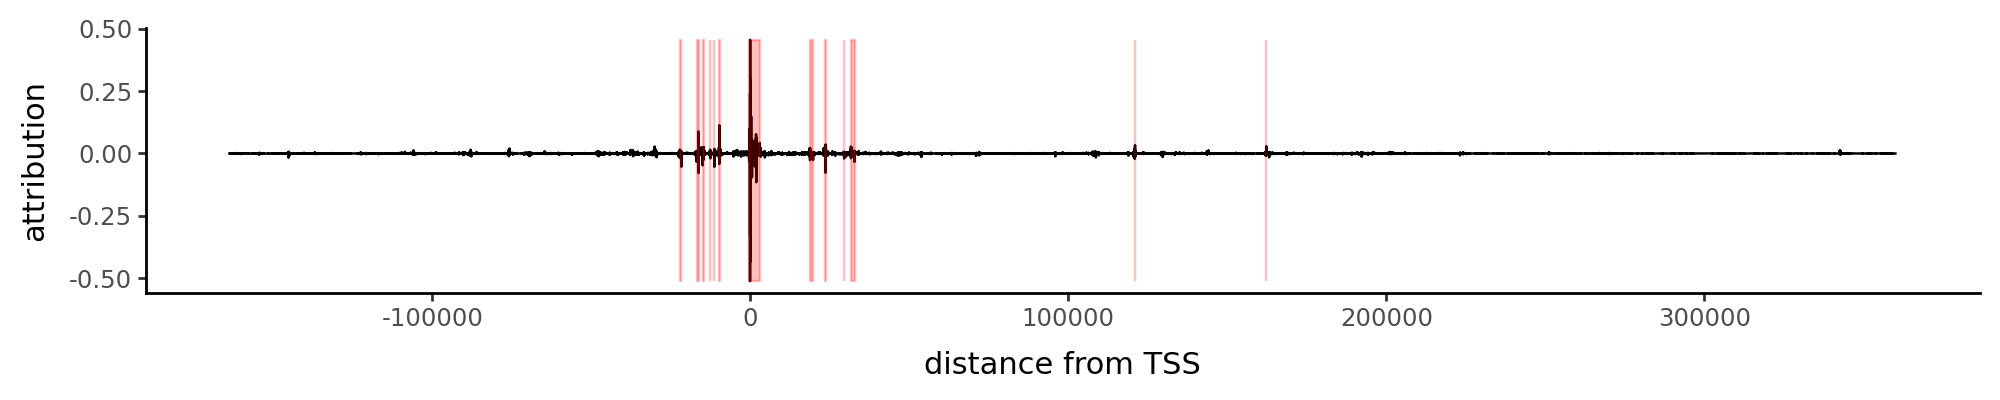

In [47]:
attrs.plot_peaks()

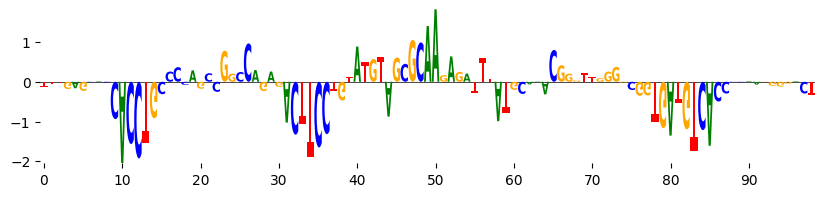

In [48]:
import matplotlib.pyplot as plt

attrs.plot_seqlogo(relative_loc=-45)
plt.show()

This comment takes around ~1 minutes and detects motifs in the attributions using FIMO. The motifs are ranked by their attribution scores:

In [49]:
df_motifs = attrs.scan_motifs()
df_motifs

,motif,peak,start,end,strand,score,p-value,matched_seq,site_attr_score,motif_attr_score,from_tss
3874,ZNF746.H13CORE.0.PSG.A,neg.SPI1@1917,165744,165770,-,26.355452,7.435330e-10,AGGGAGGAGGGAGGAAGGTGGGAGGA,-0.010775,-0.016253,1904
3453,ZN263.H13CORE.1.P.B,neg.SPI1@1898,165732,165753,+,24.008722,1.311946e-09,GGGGAGGAGGACAGGGAGGAG,-0.006567,-0.016637,1892
781,ZN479.H13CORE.0.P.C,neg.SPI1@-174,163668,163686,-,22.937369,2.837623e-09,GCCCCCAAAGTCATCCCT,-0.007155,-0.013835,-172
1036,ZNF746.H13CORE.0.PSG.A,neg.SPI1@-191,163639,163665,+,24.462995,3.833248e-09,TCTCCCTCCCATCCTCCCTCCCCAGC,-0.002449,-0.001297,-201
3545,ZNF746.H13CORE.0.PSG.A,neg.SPI1@1898,165732,165758,-,23.523391,7.853286e-09,GGGGAGGAGGACAGGGAGGAGGGAGG,-0.005327,-0.010747,1892
...,...,...,...,...,...,...,...,...,...,...,...
1088,CREB3.H13CORE.0.SM.B,neg.SPI1@-21,163819,163833,+,1.754682,4.999340e-04,GCGGTGATGTCACC,-0.206348,-0.585193,-21
2067,RXRB.H13CORE.2.PS.A,neg.SPI1@1182,165019,165030,-,12.213856,NaN,CCATGACCTCT,-0.008323,-0.024233,1179
2913,KLF7.H13CORE.0.P.B,neg.SPI1@1813,165662,165672,+,15.217368,NaN,GGGGGCGGGG,0.008973,0.025625,1822
2986,KLF7.H13CORE.0.P.B,neg.SPI1@1832,165662,165672,+,15.217368,NaN,GGGGGCGGGG,0.008973,0.025625,1822


If you just want attribution tensor from input one_hot encoded sequence prepare your input and call attributions object:

In [50]:
one_hot_seq, gene_mask = result.prepare_one_hot("SPI1")
inputs = torch.vstack([one_hot_seq, gene_mask]).unsqueeze(0)
inputs.shape  # (batch_size, 5, seq_len)

torch.Size([1, 5, 524288])

In [51]:
from decima.interpret.attributer import DecimaAttributer

attributer = DecimaAttributer(
    model=result.model,
    tasks=result.query_cells(f"cell_type in {spi1_cell_types}"),
    off_tasks=result.query_cells(f'organ == "blood" and cell_type not in {spi1_cell_types}'),
    transform="specificity",
    method="inputxgradient",
)
attrs = attributer.attribute(inputs=inputs)

attrs  # (batch_size, 4, seq_len) gene mask is removed from final attributions

tensor([[[-0.0000e+00,  0.0000e+00, -0.0000e+00,  ..., -0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [-0.0000e+00, -0.0000e+00, -2.6888e-05,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [-0.0000e+00,  1.2651e-04,  0.0000e+00,  ...,  3.7016e-05,
          -0.0000e+00,  1.5136e-05],
         [ 1.7333e-04, -0.0000e+00,  0.0000e+00,  ..., -0.0000e+00,
           1.2473e-05, -0.0000e+00]]], device='cuda:0')